# 1) Data Collection

In [3]:
# Import necessary libraries

import pandas as pd # for data manipulation
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for advanced visualization
from sklearn.model_selection import train_test_split

In [4]:
# Load the data

train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [5]:
# preview the traiin data

train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2)  Data Exploration and Visualization

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# basic statictics

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# check for missing values

print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


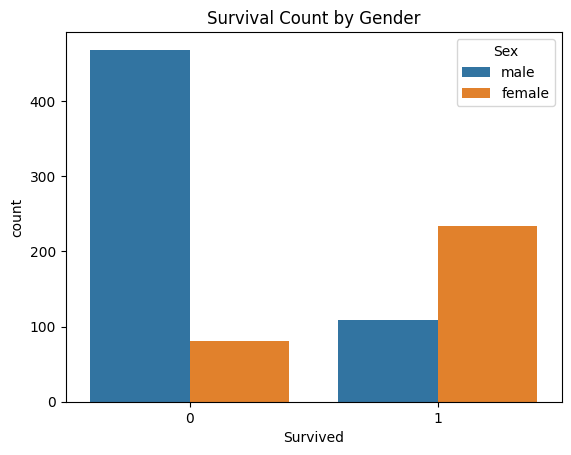

In [9]:
# Survival based on gender
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

# 3) Data Cleaning

    Handle missing values, duplicates, and outliers.

    Focuses on fixing errors in the raw data.
Examples:

    Handling missing values.
    Removing duplicates.
    Correcting typos or inconsistencies.

In [10]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing values
# Fill missing values in numerical columns
train_df['Age'].fillna(train_df['Age'].median(), inplace=True) # Fill missing Age with median
train_df['Cabin'].fillna('Unknown', inplace=True) # Fill missing Cabin with 'Unknown'
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode

/tmp/ipykernel_30/4044589586.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True) # Fill missing Age with median
/tmp/ipykernel_30/4044589586.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd

# 4) Data Preprocessing

Transforms the cleaned data into a usable format for ML algorithms.
Examples:

    Encoding categorical variables into numerical values.
    Scaling numerical data.
    Splitting data into training and testing sets.

In [13]:
# Identify numerical & categorical features

numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_df.select_dtypes(include=['category', 'object']).columns

print("Numerical Features : ", numerical_features)
print("Categorical Features : ", categorical_features)

Numerical Features :  Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical Features :  Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [14]:
# Encode categorical variables into numerical values

# Map 'Sex' to numerical values( 1 for male, 0 for female)
train_df['Sex'] = train_df['Sex'].map({'male' : 1, 'female' : 0})



# Map 'Embarked' to numerical values('C'->0, 'Q'->1, 'S'->2)
train_df['Embarked']= train_df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
 
# For 'Cabin' extract the first letter and map to numbers
train_df['Cabin'] = train_df['Cabin'].str[0] # Extract first letter of 'Cabin'
train_df['Cabin'] = train_df['Cabin'].map({'A' : 0, 'B' : 1, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'T': 7, 'U' : 8}).fillna(8) # Fill missing values in Cabin

# Replace missing values in 'Cabin' (now numerical) with a default value (e.g., 8 for Unknown)
#train_df['Cabin'] = train_df['Cabin'].fillna(8, inplace=True)

# Verify the process data
# Print the preview of the cleaned dataset
print("\nProcessed Dataset Preview")
print(train_df.head())

# Save
train_df.to_csv("Proessed_titanic_train_data.csv", index=False)


Processed Dataset Preview
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Cabin  Embarked  
0         A/5 21171   7.2500    8.0         2  
1          PC 17599  71.2833    3.0         0  
2  STON/O2. 3101282   7.9250    8.0         2  
3            113803  53.1000    3.0         2  
4            373450   8.0500 

In [15]:
# Train test split
x = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

x_train , x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

# 5) Feature Engineering

Focuses on improving features to enhance model performance.
Examples:

    Creating new features (e.g., FamilySize).
    Selecting or reducing features (e.g., removing redundant columns).

In [16]:
# Feature Engineering

# 1) Extract title from Name
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Group rare categories into a single category
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train_df['Ttitle'] = train_df['Title'].replace(rare_titles, 'Rare')
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme', 'Mrs'])

/tmp/ipykernel_30/665288370.py:10: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  train_df['Title'] = train_df['Title'].replace(['Mme', 'Mrs'])


In [19]:
# 2) Create age bins
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

In [23]:
# 3) Create fare bins
train_df['FareBin'] = pd.cut(train_df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [25]:
# 4) Family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 # +1 to include the passenger themselves

In [27]:
# 5) IsAlone Feature
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

In [28]:
# 6) Drop irrelevant columns
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [29]:
# Verify the new features
print("\nDataset After Feature Engineering: ")
print(train_df.head())


Dataset After Feature Engineering: 
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked Title  \
0         0       3    1  22.0      1      0   7.2500    8.0         2    Mr   
1         1       1    0  38.0      1      0  71.2833    3.0         0    Mr   
2         1       3    0  26.0      0      0   7.9250    8.0         2  Miss   
3         1       1    0  35.0      1      0  53.1000    3.0         2  Miss   
4         0       3    1  35.0      0      0   8.0500    8.0         2    Mr   

  Ttitle       AgeBin FareBin  FamilySize  IsAlone  
0     Mr  Young Adult     Low           2        0  
1    Mrs        Adult     Low           2        0  
2   Miss  Young Adult     Low           1        1  
3    Mrs  Young Adult     Low           2        0  
4     Mr  Young Adult     Low           1        1  


# 5) Model Building

# 6) Prediction on Test Data